# MNIST data classification using SVMs
In this demonstration, I implemented two different SVM classifiers SVC() and LinearSVC() that are based on libsvm and liblinear libraries on MNIST datasets. In addition three different kernels are studied for the SVC() classifier:
1. Radial Basis Function (RBF)
2. Polynomial
3. Linear

In the second stage, PCA is applied on the dataset before classifying using LinearSVC() classifier. The effect on the prediction accuracy due to the chosen number of Principal components is also studied.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import svm,metrics
from sklearn.decomposition import PCA
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
mnist=input_data.read_data_sets(".",one_hot=True,reshape=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
# Retrieve the training and test data
trainX, trainY = flatten(mnist.train.images), mnist.train.labels
testX, testY            = flatten(mnist.test.images), mnist.test.labels
sess=tf.Session()
with sess.as_default():
    trainX=trainX.eval()
    testX=testX.eval()

In [3]:
label=[]
for y in trainY:
    label+=list(np.where(y==1)[0])
test_label=[]
for y in testY:
    test_label+=list(np.where(y==1)[0])

Having preprocessed the data, the choice of kernel is very important for classification purposes. The idea of using kernel is illustrated in the following figure:
<img src="kernel.png" width="600" height="600" />
A Kernel essentially transforms a linearly non separable data into a higher dimensional feature space where we can find a hyperplane that can linearly separate the datapoints. The three most commonly used kernel functions in training an SVM are as follows:
1. Radial Basis Function (RBF):
    $$K(x^{(i)},x^{(j)}) = \phi(x^{(i)})^T.\phi(x^{(j)}) = e^{-\gamma||x^{(i)}-x^{(j)}||^2}$$
2. Polynomial:
    $$K(x^{(i)},x^{(j)}) = (x^{(i)^{T}}.x^{(j)}+c)^d$$
3. Linear:
    $$K(x^{(i)},x^{(j)}) = x^{(i)^{T}}.x^{(j)}$$

The following code sections shows the accuracy and some more important parameters for these three different kernels.

#### RBF Kernel

In [8]:
clf = svm.SVC()
clf.fit(trainX, label) 
print(clf)

print("Support vectors dimenstions: ",clf.support_vectors_.shape)
print("Number of support vectors for each class 0-9: ",clf.n_support_ )
print("Indices of the support vectors: ",clf.support_ )

accuracy=clf.score(testX,test_label)
print("Accuracy for SVC: ",accuracy)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Support vectors dimenstions:  (18451, 784)
Number of support vectors for each class 0-9:  [1050 1093 1866 2148 1875 2490 1385 1699 2355 2490]
Indices of the support vectors:  [   52    82   144 ..., 54969 54973 54992]
Accuracy for SVC:  0.9439


#### Poly Kernel

In [4]:
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(trainX, label) 
print(clf_poly)

print("Support vectors dimenstions: ",clf_poly.support_vectors_.shape)
print("Number of support vectors for each class 0-9: ",clf_poly.n_support_ )
print("Indices of the support vectors: ",clf_poly.support_ )

accuracy_poly=clf_poly.score(testX,test_label)
print("Accuracy for SVC using poly kernel : ",accuracy_poly)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Support vectors dimenstions:  (51465, 784)
Number of support vectors for each class 0-9:  [4006 5920 5055 5290 5306 4987 4921 5492 5065 5423]
Indices of the support vectors:  [   10    48    52 ..., 54973 54990 54992]
Accuracy for SVC using poly kernel :  0.5532


#### Linear Kernel

In [5]:
clf_linK = svm.SVC(kernel='linear')
clf_linK.fit(trainX, label) 
print(clf_linK)

print("Support vectors dimenstions: ",clf_linK.support_vectors_.shape)
print("Number of support vectors for each class 0-9: ",clf_linK.n_support_ )
print("Indices of the support vectors: ",clf_linK.support_ )

accuracy_linK=clf_linK.score(testX,test_label)
print("Accuracy for SVC using poly kernel : ",accuracy_linK)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Support vectors dimenstions:  (9620, 784)
Number of support vectors for each class 0-9:  [ 524  470 1027 1239  918 1287  647  898 1346 1264]
Indices of the support vectors:  [   52   144   192 ..., 54969 54973 54992]
Accuracy for SVC using poly kernel :  0.9393


Having studied the accuracies of 3 different kernels of SVC(), we see that the best accuracy is for the RBF kernel (94.39%). This is because the RBF kernel projects the data into an infinite dimensional space where finding a linear classifier (hyperplane) becomes much more probable. Also, we dont see much difference in using Linear or RBF Kernels because MNIST has 784 features. Thats huge in itself that one doesn't need to use a kernel function to project into a higher dimensional feature space. The data is almost linearly separable in the 784 dimensional feature space and thus using RBF kernel is computational expensive in this case as the classifier needs to train 2 cofficients \gamma and C. We can also see that the polynomial kernel  with degree 3 has an accuracy of 55.32% and this can be increased if the degree of the polynomial kernel is increased to say 4 or 5. 

The following shows the classification report and the confusion matrix for SVC() using a RBF kernel.

In [67]:
predicted=clf.predict(testX)
expected=test_label

#clf.get_params(deep=True)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.93      0.93      1032
          3       0.93      0.94      0.93      1010
          4       0.93      0.95      0.94       982
          5       0.93      0.91      0.92       892
          6       0.95      0.97      0.96       958
          7       0.96      0.93      0.94      1028
          8       0.94      0.92      0.93       974
          9       0.94      0.92      0.93      1009

avg / total       0.94      0.94      0.94     10000


Confusion matrix:
[[ 967    0    1    0    0    5    5    1    1    0]
 [   0 1120    2    3    0 

# Linear SVM

## Introduction
The main difference between SVC() and LinearSVC() is that, they use libsvm and liblinear libraries respectively internally. So LinearSVC() has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

Also, in multiclass classification, liblinear does one-vs-rest by default whereas libsvm does one-vs-one. In other words, for a 10 class problem like MNIST, LinearSVC() produces just 10 classifiers whereas SVC() produces 10*(10-1)/2=45 classifiers.

In [11]:
lin_clf = svm.LinearSVC()
print(lin_clf.fit(trainX, label))
lin_accuracy=lin_clf.score(testX,test_label)
print("Accuracy for linear SVM: ",lin_accuracy)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Accuracy for linear SVM:  0.917


Note that the LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option multi_class='crammer_singer'. This method is consistent, which is not true for one-vs-rest classification. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.

As similar to previous, the classification report and the confusion matrix is shown below for the LinearSVC() classifier.

In [69]:
predicted_lin=lin_clf.predict(testX)

#clf.get_params(deep=True)
print("Classification report for classifier %s:\n%s\n"
      % (lin_clf, metrics.classification_report(expected, predicted_lin)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted_lin))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.88      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.91      0.93      0.92       982
          5       0.89      0.86      0.87       892
          6       0.94      0.95      0.94       958
          7       0.92      0.92      0.92      1028
          8       0.87      0.87      0.87       974
          9       0.89      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000


Confusion matrix:
[[ 960    0    1    1    1    4    7    3    2    1]
 [   0 1115    3    1    0    1    4

# Results Summary so far

I studied 2 SVM functions in the sklearn library for the MNIST dataset, SVC() and LinearSVC(). The MNIST dataset is as follows:
1. Training: 55000 images
2. Test    : 10000 images

I also studied the SVC_SVM for 3 different kernels: RBF, Poly and Linear. From the above results, we can see that the accuracies for the three versions of SVC_SVM are 94.39%, 55.32% , 93.33% respectively.
Also, the accuracy for the LinearSVC is found to be 91.7%

### PCA on a linearSVM

In [18]:
accuracies=list()
for k in range(100,500,50):
    pca= PCA(n_components=k)
    pca.fit(trainX)
    train_pca=pca.transform(trainX)
    test_pca=pca.transform(testX)
    lin_clf1 = svm.LinearSVC()
    lin_clf1.fit(train_pca, label)
    accuracies.append(lin_clf1.score(test_pca,test_label))

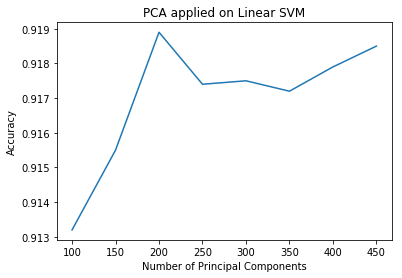

In [20]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(range(100,500,50)),accuracies)
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("PCA applied on Linear SVM")
plt.show()

## Discussion: PCA applied on LinearSVC() SVM
We can see an overall increasing trend of the accuracy with the number of principal components. The classification accuracy is traded for the improvement in SVM training time for lower dimensional feature space training data. SVM is essentially a convex Quadratic problem the solving time of which is highly dependent on the number of training vectors and number of features in each vector. The main reason for rhis behavior is due to the calculation of Kernel matrix that's happening internally and which is computationally intensive.

We can see that the accuracy is not much reduced with reducing the number of principal components (91.8% -> 91.3% from 450 -> 100 PCAs). But instead by doing PCA we will gain lot of advantage on computational time in training the SVM.